# Two-layer Neural Network Workbook for CS145 Homework 3

----
<span style="color:red">**PRINT YOUR NAME AND UID HERE!**</span>

NAME: [MIN, SIHAN] UID: [504807176]

----


Please follow the notebook linearly to implement a two layer neural network.

Please print out the workbook entirely when completed.

The goal of this workbook is to give you experience with training a two layer neural network.

---

Import libraries and define relative error function, which is used to check results later. 

In [15]:
import random
import numpy as np
from cs145.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

## Toy example

Before loading CIFAR-10, there will be a toy example to test your implementation of the forward and backward pass.

In [16]:
from lib.neural_net import TwoLayerNet

In [17]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

### Compute forward pass scores

In [18]:
## Implement the forward pass of the neural network.

# Note, there is a statement if y is None: return scores, which is why 
# the following call will calculate the scores.
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
    [-1.07260209,  0.05083871, -0.87253915],
    [-2.02778743, -0.10832494, -1.52641362],
    [-0.74225908,  0.15259725, -0.39578548],
    [-0.38172726,  0.10835902, -0.17328274],
    [-0.64417314, -0.18886813, -0.41106892]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

correct scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

Difference between your scores and correct scores:
3.381231204052648e-08


### Forward pass loss

The total loss includes data loss (MSE) and regularization loss, which is,

$$L = L_{data}+L_{reg} = \frac{1}{2N}\sum_{i=1}^{N}\left(\boldsymbol{y}_{\text{pred}}-\boldsymbol{y}_{\text{target}}\right)^2 + \frac{\lambda}{2} \left(||W_1||^2 + ||W_2||^2 \right)$$

More specifically in multi-class situation, if the output of neural nets from one sample is $y_{\text{pred}}=(0.1,0.1,0.8)$ and $y_{\text{target}}=(0,0,1)$ from the given label, then the MSE error will be $Error=(0.1-0)^2+(0.1-0)^2+(0.8-1)^2=0.06$

Implement data loss and regularization loss. In the MSE function, you also need to return the gradients which need to be passed backward. This is similar to batch gradient in linear regression. Test your implementation of loss functions. The Difference should be less than 1e-12.

In [5]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss_MSE = 3.775701133135245 # check this number

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss_MSE)))

Difference between your loss and correct loss:
0.0


### Backward pass (You do not need to implemented this part)

We have already implemented the backwards pass of the neural network for you.  Run the block of code to check your gradients with the gradient check utilities provided. The results should be automatically correct (tiny relative error).

If there is a gradient error larger than 1e-8, the training for neural networks later will be negatively affected.

In [19]:
from cs145.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('{} max relative error: {}'.format(param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 6.6428653355097e-10
b2 max relative error: 2.4554844805570154e-11
W1 max relative error: 7.554564328075232e-10
b1 max relative error: 7.382451041178829e-10


### Training the network

Implement neural_net.train() to train the network via stochastic gradient descent, much like the linear regression.

Final training loss:  0.2680575211279022


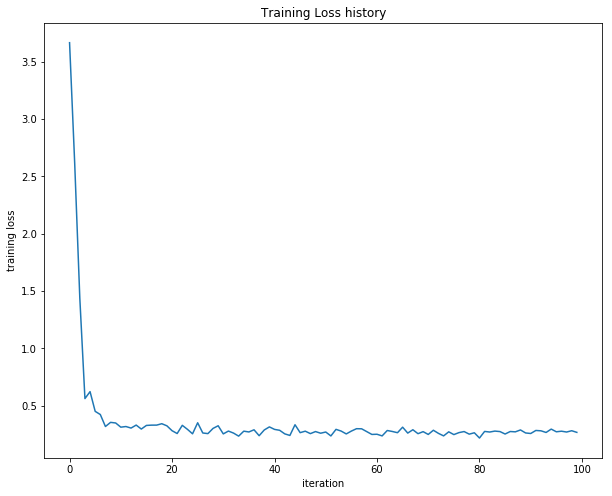

In [20]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

## Classify CIFAR-10

Do classification on the CIFAR-10 dataset.

In [21]:
from cs145.data_utils import load_CIFAR10
import random
import numpy as np
#from cs145.data_utils import load_CIFAR10
#import matplotlib.pyplot as plt
#from lib.neural_net import TwoLayerNet

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = './cs145/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


### Running SGD

If your implementation is correct, you should see a validation accuracy of around 15-18%.

In [27]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network

stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-5, learning_rate_decay=0.95,
            reg=0.1, verbose=True)


# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Save this net as the variable subopt_net for later comparison.
subopt_net = net

iteration 0 / 1000: loss 1.0000545918300714
iteration 100 / 1000: loss 0.9991545241908805
iteration 200 / 1000: loss 0.9980238748283694
iteration 300 / 1000: loss 0.9959727509256586
iteration 400 / 1000: loss 0.9908309556743511
iteration 500 / 1000: loss 0.9820376185839631
iteration 600 / 1000: loss 0.9649114847660253
iteration 700 / 1000: loss 0.9440222659120749
iteration 800 / 1000: loss 0.9231669566536581
iteration 900 / 1000: loss 0.9153514288040121
Validation accuracy:  0.155


In [28]:
stats['train_acc_history']

[0.12, 0.17, 0.185, 0.12, 0.2]

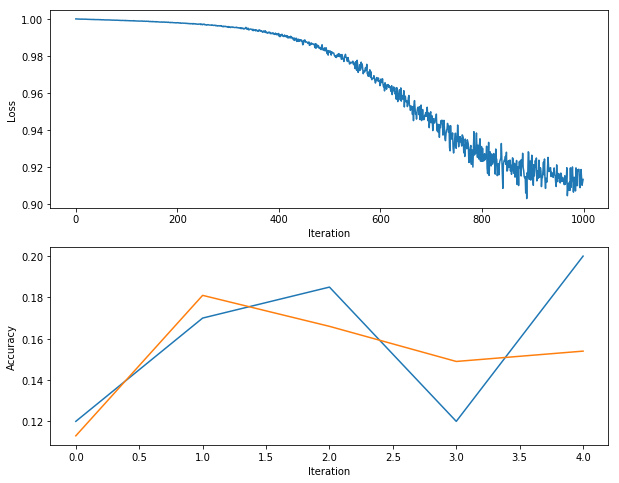

In [29]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')

plt.show()

### Questions:

The training accuracy isn't great. It seems even worse than simple KNN model, which is not as good as expected.

(1) What are some of the reasons why this is the case?  Take the following cell to do some analyses and then report your answers in the cell following the one below.

(2) How should you fix the problems you identified in (1)?

### Answers:

(1) I think there might be several reasons for the low accuracy:
    a) The number of iterations is only 1000. We can see in the graph that the loss is not yet converged.
    b) The regularization strength is set to be 0.1. It might be too big for the training process and might cause too agressive updates.
    c) The learning rate decay is 0.95, which might be not small enough. When the decay is too small, the learning rate may cause result bouncing near the optimal value and slow down the convergence. 

(2) We should increase number of iterations for more sufficient training, decrease regularization strength for more accurate updates, and decrease learning rate decay for faster decays.

## Optimize the neural network

Use the following part of the Jupyter notebook to optimize your hyperparameters on the validation set.  Store your nets as best_net. 

**Important: Think about whether you should retrain a new model from scratch every time your try a new set of hyperparameters. **

In [14]:
best_net = None # store the best model into this 

# ================================================================ #
# YOUR CODE HERE:
#   Optimize over your hyperparameters to arrive at the best neural
#   network.  You should be able to get over 45% validation accuracy.
#   For this part of the notebook, we will give credit based on the
#   accuracy you get.  Your score on this question will be multiplied by:
#      min(floor((X - 23%)) / %22, 1) 
#   where if you get 50% or higher validation accuracy, you get full
#   points.
#
#   Note, you need to use the same network structure (keep hidden_size = 50)!
# ================================================================ #

# todo: optimal parameter search (you can use grid search by for-loops )

input_size = 32 * 32 * 3 # do not change
hidden_size = 50 # do not change
num_classes = 10 # do not change
best_valacc = 0 # do not change

# Train the network and find best parameter: 
#net = TwoLayerNet(input_size, hidden_size, num_classes)
lr = 1e-3
lrd_array = np.arange(0.6, 0.86, 0.05)
reg = 1e-5
iters_array = np.arange(4000, 5100, 500)
batch_array = np.arange(100, 210, 100)


best_iters = 5000
best_lrd = 0.85
best_batch = 200


'''
best_iters = 0
best_lrd = 0
best_batch = 0

string = ""
for iters in iters_array:
    for batch in batch_array:
        for lrd in lrd_array:
            print("START TO TRAIN: ", lrd, iters, batch)
            acc = 0
            for i in range(20):
                print("Iteration: ", i+1)
                best_net = TwoLayerNet(input_size, hidden_size, num_classes)
                stats = best_net.train(X_train, y_train, X_val, y_val,learning_rate=lr, 
                                  learning_rate_decay=lrd, reg=reg, num_iters=iters,
                                  batch_size=batch, verbose=True)
                val_acc = (best_net.predict(X_val) == y_val).mean()
                print('Validation accuracy: ', val_acc, "\n")
                acc += val_acc
            acc /= 20
            string += str(lrd) + " , " + str(iters) + " , " + str(batch) + " , " + str(acc) + "\n" 
            print("Average: ", acc)
            if (acc > best_valacc):
                best_iters = iters
                best_lrd = lrd
                best_batch = batch
                best_valacc = acc
                print("NEW BEST ACCURACY: ", acc)
            print("\n")


print(string)

'''

#print("START TO TRAIN: ", lrd, iters, batch)
for i in range(5):
    print("Round: ", i+1)
    temp_net = TwoLayerNet(input_size, hidden_size, num_classes)
    stats = temp_net.train(X_train, y_train, X_val, y_val,learning_rate=lr, 
                           learning_rate_decay=best_lrd, reg=reg, num_iters=best_iters,
                           batch_size=best_batch, verbose=True)
    val_acc = (temp_net.predict(X_val) == y_val).mean()
    print('Validation accuracy: ', val_acc, "\n")
    if (val_acc > best_valacc):
        print("NEW BEST ACCURACY: ", val_acc, "\n")
        best_net = temp_net
        best_valacc = val_acc


# Output your results
print("== Best parameter settings ==")
print("learning_rate = ", lr, 
      "\nlearning_rate_decay = ", best_lrd, 
      "\nreg = ", reg, 
      "\nnum_iters = ", best_iters,
      "\nbatch_size = ", best_batch)
# print your best parameter setting here!
print("Best accuracy on validation set: {}".format(best_valacc))
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

Round:  1
iteration 0 / 5000: loss 0.9998770638220225
iteration 500 / 5000: loss 0.7255146784437178
iteration 1000 / 5000: loss 0.6723827517321507
iteration 1500 / 5000: loss 0.7004617193093652
iteration 2000 / 5000: loss 0.6527009004001181
iteration 2500 / 5000: loss 0.6516584484704943
iteration 3000 / 5000: loss 0.6743923692026933
iteration 3500 / 5000: loss 0.7041735024363046
iteration 4000 / 5000: loss 0.672281732571264
iteration 4500 / 5000: loss 0.6524429542081063
Validation accuracy:  0.502 

NEW BEST ACCURACY:  0.502 

Round:  2
iteration 0 / 5000: loss 0.9999478582872005
iteration 500 / 5000: loss 0.71605591696509
iteration 1000 / 5000: loss 0.724520642389652
iteration 1500 / 5000: loss 0.7079019003489974
iteration 2000 / 5000: loss 0.6773474567282721
iteration 2500 / 5000: loss 0.6562405964055896
iteration 3000 / 5000: loss 0.6839495707856716
iteration 3500 / 5000: loss 0.6580758508193543
iteration 4000 / 5000: loss 0.6604829984608933
iteration 4500 / 5000: loss 0.64423053985

### Quesions

(1) What is your best parameter settings? (Output from the previous cell)

(2) What parameters did you tune? How are they changing the performance of nerural network? You can discuss any observations from the optimization.

### Answers

(1) My best parameter settings are: learning_rate =  0.001, learning_rate_decay =  0.85, reg =  1e-05, num_iters =  5000, batch_size =  200, Best accuracy on validation set: 0.51

(2) I mainly tuned three parameters: learning_rate_decay, num_iters, and batch_size. 

Generally, learning_rate affects the performance most. When it is smaller than 1500, all the combination of parameters fail to have satisfying performance. However, after the result converges (more than 6000), it won't make too much of a difference to add iterations. I think regularization strenth and initial learning rate is already good as default, but changes on learning_rate_decay is needed. A decay rate that is too slow (more than 0.9) might result in bouncing around the optimal result, while a decay rate too fast(less than 0.65) might harm the convergence. The optimal batch size varies with other parameters, so I use three for loop to try different combinations of the three parameters, each one with twenty trials and calculate the average accuracy. The parameter set with the highest average accuracy is used as my best parameters.


## Visualize the weights of your neural networks

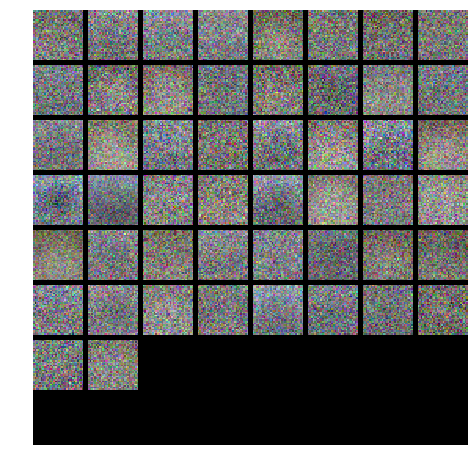

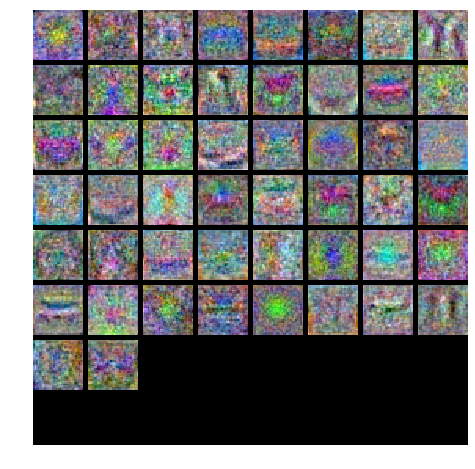

In [30]:
from cs145.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.T.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(subopt_net)
show_net_weights(best_net)

### Questions:

What differences do you see in the weights between the suboptimal net and the best net you arrived at? What do the weights in neural networks probably learn after training?

### Answer:


We can see that in the suboptimal net there is no obvious meaningful pattern in the resulting masks. They are more like random noises.

However, in our best net, we could distinguish very obvious difference in color and contrast in the visualized neural network, even some traits of animal faces. The weights in neural networks probably learned features of different classes after training for classification.


## Evaluate on test set 

In [31]:
test_acc = (best_net.predict(X_test) == y_test).mean()
#test_acc = (subopt_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.493


### Questions:
(1) What is your test accuracy by using the best NN you have got? How much does the performance increase compared with kNN? Why can neural networks perform better than kNN?

(2) Do you have any other ideas or suggestions to further improve the performance of neural networks other than the parameters you have tried in the homework? 

### Answers:

(1) My test accuracy is 0.493. The accuracy increases from 27.4% to 49.3%, almost doubled. Neural network is better probably because it is designed to have more complicated and comprehensive calculations. It considers all attributes in each vectors and utilizes them to train the network, while KNN only take several nearest vectors into count for predictions.

(2) To further improve the performance of neural networks, I think larger training dataset might be helpful. Also, we should add more hidden layers and experiment on different network topology for more accurate neural network.


## Bonus Question: Change MSE Loss to Cross Entropy Loss

This is a bonus question. If you finish this (cross entropy loss) correctly, you will get **up to 20 points** (add up to your HW3 score). 

Note: From grading policy of this course, your maximum points from homework are still 25 out of 100, but you can use the bonus question to make up other deduction of other assignments.

Pass output scores in networks from forward pass into softmax function. The softmax function is defined as,
$$p_j = \sigma(z_j) = \frac{e^{z_j}}{\sum_{c=1}^{C} e^{z_c}}$$
After softmax, the scores can be considered as probability of $j$-th class.

The cross entropy loss is defined as,
$$L = L_{\text{CE}}+L_{reg} = \frac{1}{N}\sum_{i=1}^{N} \log \left(p_{i,j}\right)+ \frac{\lambda}{2} \left(||W_1||^2 + ||W_2||^2 \right)$$

To take derivative of this loss, you will get the gradient as,
$$\frac{\partial L_{\text{CE}}}{\partial o_i} = p_i - y_i $$

More details about multi-class cross entropy loss, please check [http://cs231n.github.io/linear-classify/](http://cs231n.github.io/linear-classify/) and [more explanation](https://deepnotes.io/softmax-crossentropy) about the derivative of cross entropy.

Change the loss from MSE to cross entropy, you only need to change you ```MSE_loss(x,y)``` in ```TwoLayerNet.loss()``` function to ```softmax_loss(x,y)```.

**Now you are free to use any code to show your results of the two-layer networks with newly-implemented cross entropy loss. You can use code from previous cells.**

In [ ]:
# Start training your networks and show your results


In [39]:
best_softmax_net = None 
input_size = 32 * 32 * 3 # do not change
hidden_size = 50 # do not change
num_classes = 10 # do not change
best_valacc = 0 # do not change

# Train the network and find best parameter: 
#net = TwoLayerNet(input_size, hidden_size, num_classes)
lr = 1e-3
lrd_array = np.arange(0.6, 0.86, 0.05)
reg = 1e-5
iters_array = np.arange(4000, 5100, 500)
batch_array = np.arange(100, 210, 100)


best_iters = 5000
best_lrd = 0.85
best_batch = 200

for i in range(5):
    print("Round: ", i+1)
    temp_net = TwoLayerNet(input_size, hidden_size, num_classes)
    stats = temp_net.train(X_train, y_train, X_val, y_val,learning_rate=lr, 
                           learning_rate_decay=best_lrd, reg=reg, num_iters=best_iters,
                           batch_size=best_batch, verbose=True)
    val_acc = (temp_net.predict(X_val) == y_val).mean()
    print('Validation accuracy: ', val_acc, "\n")
    if (val_acc > best_valacc):
        print("NEW BEST ACCURACY: ", val_acc, "\n")
        best_softmax_net = temp_net
        best_valacc = val_acc
                            
# Output your results
print("== Best parameter settings ==")
print("learning_rate = ", lr, 
      "\nlearning_rate_decay = ", best_lrd, 
      "\nreg = ", reg, 
      "\nnum_iters = ", best_iters,
      "\nbatch_size = ", best_batch)
# print your best parameter setting here!
print("Best accuracy on validation set (softmax): {}".format(best_valacc))
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

Round:  1
iteration 0 / 5000: loss 2.302591594371239
iteration 500 / 5000: loss 1.590830686025476
iteration 1000 / 5000: loss 1.5564754990530416
iteration 1500 / 5000: loss 1.3999697936041653
iteration 2000 / 5000: loss 1.247947621624462
iteration 2500 / 5000: loss 1.4531582488181636
iteration 3000 / 5000: loss 1.3548642564437885
iteration 3500 / 5000: loss 1.2090970232877298
iteration 4000 / 5000: loss 1.4275378830234975
iteration 4500 / 5000: loss 1.2579189220916913
Validation accuracy:  0.5 

NEW BEST ACCURACY:  0.5 

Round:  2
iteration 0 / 5000: loss 2.302592706468035
iteration 500 / 5000: loss 1.7305881003545727
iteration 1000 / 5000: loss 1.5695513173726996
iteration 1500 / 5000: loss 1.370888039699506
iteration 2000 / 5000: loss 1.4977621382975144
iteration 2500 / 5000: loss 1.2521010671442157
iteration 3000 / 5000: loss 1.2091960350360036
iteration 3500 / 5000: loss 1.327514887147684
iteration 4000 / 5000: loss 1.2443561222164958
iteration 4500 / 5000: loss 1.2740600231485757
